In [86]:
import numpy as np
import pandas as pd
from os import getcwd

In [87]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [88]:
data_train = pd.read_csv(f'{getcwd()}/train_Wc8LBpr.csv')
data_test = pd.read_csv(f'{getcwd()}/test_VsU9xXK.csv')
data_test.shape
data_train.shape

(131662, 14)

In [109]:
train = pd.read_csv(f'{getcwd()}/train_Wc8LBpr.csv')



In [110]:
targets=train['Surge_Pricing_Type'].copy()

In [111]:
train=train.drop(columns=['Surge_Pricing_Type'])

In [112]:
train=train.drop(columns=['Trip_ID'])

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  object 
 2   Customer_Since_Months        125742 non-null  float64
 3   Life_Style_Index             111469 non-null  float64
 4   Confidence_Life_Style_Index  111469 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         60632 non-null   float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 12.1+ MB


In [114]:
# to find null values
train.isnull().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
dtype: int64

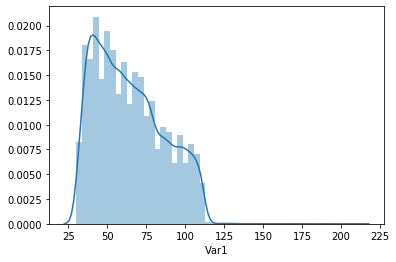

In [115]:
sns.distplot(train['Var1'])

In [116]:
train['Var1'].describe()

count    60632.000000
mean        64.202698
std         21.820447
min         30.000000
25%         46.000000
50%         61.000000
75%         80.000000
max        210.000000
Name: Var1, dtype: float64

In [117]:
x=np.random.randint(30,211,(71030,))
train['Var1'][train['Var1'].isnull()]=x

C:\Users\jarvis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
train['Var1'][train['Var1'].isnull()]

Series([], Name: Var1, dtype: float64)

In [119]:
train['Var1']=np.log(train['Var1'])
train['Var2']=np.log(train['Var2'])
train['Var3']=np.log(train['Var3'])

In [120]:
train['Type_of_Cab'] = train['Type_of_Cab'].map({'A':0,'B':1,'C':2,'D':3,'E':4})
train['Confidence_Life_Style_Index'] = train['Confidence_Life_Style_Index'].map({'A':0,'B':1,'C':2})
train['Destination_Type'] = train['Destination_Type'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13})
train['Gender'] = train['Gender'].map({'Male':1,'Female':0})

In [121]:
train=train.round(2)
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  float64
 2   Customer_Since_Months        125742 non-null  float64
 3   Life_Style_Index             111469 non-null  float64
 4   Confidence_Life_Style_Index  111469 non-null  float64
 5   Destination_Type             131662 non-null  int64  
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  float64
 10  Var3                         131662 non-null  float64
 11  Gender                       131662 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 12.1 MB


In [122]:
train

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,6.77,1.0,1.0,2.43,0.0,0,3.90,0,3.69,3.83,4.09,0
1,29.47,1.0,10.0,2.78,1.0,0,3.45,0,3.64,4.03,4.36,1
2,41.58,NaN,10.0,NaN,NaN,4,3.50,2,4.20,4.03,4.34,1
3,61.56,2.0,10.0,NaN,NaN,0,3.45,0,3.71,3.95,4.30,1
4,54.95,2.0,10.0,3.03,1.0,0,3.40,4,3.93,3.89,4.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,3.0,1.0,2.74,0.0,0,3.28,0,4.11,3.85,4.33,1
131658,74.81,2.0,7.0,2.81,2.0,0,0.44,0,5.13,4.14,4.48,1
131659,40.17,2.0,10.0,3.00,1.0,0,3.34,0,3.74,3.87,4.32,0
131660,46.88,1.0,4.0,3.05,0.0,1,4.16,1,3.85,3.99,4.37,1


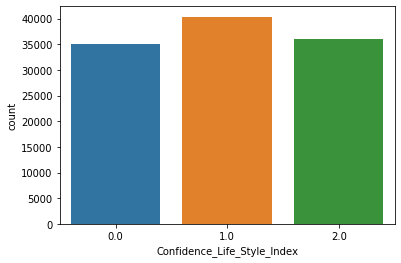

In [123]:
sns.countplot(train['Confidence_Life_Style_Index'])

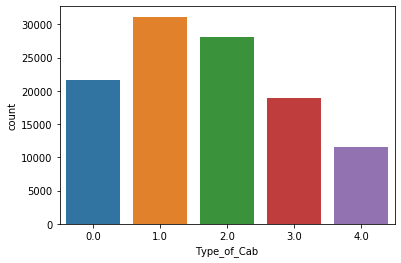

In [124]:
sns.countplot(train['Type_of_Cab'])

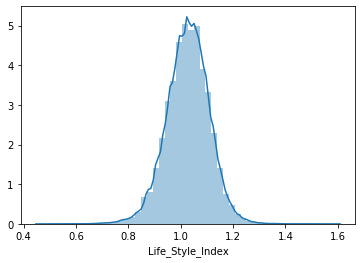

In [129]:
sns.distplot(train['Life_Style_Index'])

In [49]:
train['Life_Style_Index'].describe()

count    111469.000000
mean          2.802048
std           0.225822
min           1.600000
25%           2.650000
50%           2.800000
75%           2.950000
max           4.880000
Name: Life_Style_Index, dtype: float64

In [126]:
x=np.random.normal(2.8,0.23,20193)
train['Life_Style_Index'][train['Life_Style_Index'].isnull()]=x

C:\Users\jarvis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
train['Life_Style_Index']=np.log(train['Life_Style_Index'])

In [130]:
train['Confidence_Life_Style_Index']=train['Confidence_Life_Style_Index'].fillna(1)

In [131]:
train['Type_of_Cab']=train['Type_of_Cab'].fillna(1.7)

In [132]:
train['Customer_Since_Months']=train['Customer_Since_Months'].fillna(6.0)

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  float64
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  float64
 5   Destination_Type             131662 non-null  int64  
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  float64
 10  Var3                         131662 non-null  float64
 11  Gender                       131662 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 12.1 MB


In [151]:
test = pd.read_csv(f'{getcwd()}/test_VsU9xXK.csv')

In [152]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

In [153]:
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [154]:
test['Type_of_Cab'] = test['Type_of_Cab'].map({'A':0,'B':1,'C':2,'D':3,'E':4})
test['Confidence_Life_Style_Index'] = test['Confidence_Life_Style_Index'].map({'A':0,'B':1,'C':2})
test['Destination_Type'] = test['Destination_Type'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13})
test['Gender'] = test['Gender'].map({'Male':1,'Female':0})

In [155]:
test['Customer_Since_Months']=test['Customer_Since_Months'].fillna(6.0)
test['Type_of_Cab']=test['Type_of_Cab'].fillna(1.7)
test['Confidence_Life_Style_Index']=test['Confidence_Life_Style_Index'].fillna(1)




In [157]:
x=np.random.normal(2.8,0.23,13327)
test['Life_Style_Index'][test['Life_Style_Index'].isnull()]=x

C:\Users\jarvis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


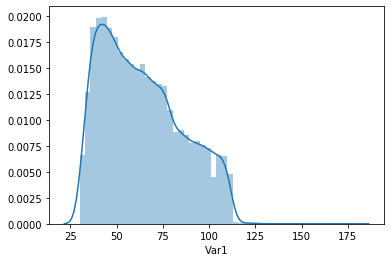

In [158]:
sns.distplot(test['Var1'])

In [159]:
test['Var1'].describe()

count    40606.000000
mean        63.936610
std         21.636247
min         30.000000
25%         45.000000
50%         61.000000
75%         79.000000
max        178.000000
Name: Var1, dtype: float64

In [160]:
x=np.random.randint(30,179,(46789,))
test['Var1'][test['Var1'].isnull()]=x

C:\Users\jarvis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
test=test.drop(columns=['Trip_ID'])

In [162]:
test['Life_Style_Index']=np.log(test['Life_Style_Index'])

In [163]:
test['Var1']=np.log(test['Var1'])
test['Var2']=np.log(test['Var2'])
test['Var3']=np.log(test['Var3'])

In [164]:
# use lightgbm classifier
from lightgbm import LGBMClassifier


In [167]:
model = LGBMClassifier(bagging_freq= 125,bagging_fraction=0.98,boost_from_average=False,
                       boosting_type='gbdt',feature_fraction= 0.5,learning_rate=0.005,max_depth= -1,
                       min_data_in_leaf= 80,min_sum_hessian_in_leaf= 16.0,num_leaves=40,num_threads= 8,
                       tree_learner= 'serial',objective= 'multiclass',num_class= 3,verbosity= 1,n_jobs=-1,
                       metric = "multi_logloss",n_estimators=200,)
model.fit(train,targets)

LGBMClassifier(bagging_fraction=0.98, bagging_freq=125,
               boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               metric='multi_logloss', min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=80, min_split_gain=0.0,
               min_sum_hessian_in_leaf=16.0, n_estimators=200, n_jobs=-1,
               num_class=3, num_leaves=40, num_threads=8,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0,
               tree_learner='serial', ...)

In [168]:
from sklearn.model_selection import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)
compute_score(model, train, targets, scoring='accuracy')

0.6937385169907478

In [171]:
output1=model.predict(test)
np.unique(output1)

array([1, 2, 3], dtype=int64)

In [294]:
# to get submission csv file
sub=pd.read_csv(f'{getcwd()}/sample_submission_NoPBkjr.csv',index_col='Trip_ID')
sub['Surge_Pricing_Type']=output1
sol=sub.to_csv('sol101.csv')